# Entrada al algoritmo

- object_list = [(1,2), (2,2), (1,1), (3,2)]
- frequencies_list = [5, 10, 10, 15]
- width = 20

# Preprocesamiento

- rectangles_list = [Rectangle(p[0],p[1]) for p in object_list]

# Ejemplo de salida

- positions_list = [(0,0),(3,0),...]
- order_list = [3,2,1,3,3,2,1,1,1,1,2]

# Imports

In [1]:
%load_ext memory_profiler

%matplotlib notebook
# %matplotlib tk
import matplotlib.pyplot as plt
import matplotlib.animation
import matplotlib.patches as patches
import numpy as np

## Clase Rectángulo

Crea objetos rectangulo con los atributos:
- **Width**: anchura del rectángulo.
- **Height**: altura del rectángulo.
- **Area**: área del rectángulo
- **(x,y)**: coordenadas de la esquina inferior izquierda.

Además, tiene dos métodos:

- **lt**: recibe un rectangulo por entrada y devuelve true si el área del rectangulo es *lower than* el área del rectangulo de entrada
- **str**: imprime los atributos del rectángulo

In [2]:
class Rectangle:
    def __init__(self, width, height, x=None, y=None):
        self.width = width
        self.height = height
        self.area = width*height
        self.x = x
        self.y = y
        
    def __lt__(self, other):
        return self.area < other.area
    
    def __str__(self):
        return "Coordinates: ({}, {})\tShape: ({}, {})\t Area:{}".format(self.x, self.y, self.width, self.height, self.area)

# Función Recursive Packing

Coloca un rectángulo en el espacio *acotado* de entrada **S2**.

1. Primero comprueba con la función **fits** algún rectángulo de los que hay en la lista de rectángulos entra en S2. En caso de entrar, devuelve el primero que entra. En caso contrario, devuelve *None* y salimos de la función.

2. En caso de que algun rectángulo se ajuste al espacio S2, la función **pack** coloca el rectángulo en el espacio S2 y devuelve los dos subespacios acotados que quedan tras incorporar el rectángulo. Siempre se realizará colocando el rectángulo en la esquina inferior izquierda del espacio S2 y devolviendo los subespacios acotados restantes S3 y S4 definidos como sigue:


![Imagen no subida](/notebooks/Desktop/HR_StripPacking/coloca_espacio_acotado.PNG)



Nota: La lista de rectángulos recibe por entrada un lista de rectángulos **ordenados descrecientemente por área**. De esta forma, los rectangulos más grandes serán colocados en primer lugar.

In [3]:
def recursive_packing(S2):
    #Comprobamos si algun rectángulo entra en S2
    valid_rectangle_position = fits(S2)
    
    #Si ninguno entra, salimos
    if valid_rectangle_position == None:
        return
    #Si entra algun rectángulo
    else:
        
        #Colocamos en S2 el primer rectangulo que encontremos en la lista y devolvemos los subespacios acotados S3 y S4.
        S3, S4 = pack(S2, valid_rectangle_position)
        
        #Llamamos recursivamente a la funcion recursive_packing con el rectangulo de mayor área.
        if S3.area > S4.area:
            recursive_packing(S3)
            
            #Comprobamos que S4 no tiene área cero.
            if(S4.area > 0):
                recursive_packing(S4)
        else:
            recursive_packing(S4)
            
            #Comprobamos que S3 no tiene área cero.
            if(S3.area > 0):
                recursive_packing(S3)
        

### Función auxiliar fits

Comprueba si algun rectángulo de la lista de rectángulos entra en el espacio S2. En caso contrario, devuelve None.

In [4]:
def fits(s):
    for i, r in enumerate(rectangles_list):
        if r.width <= s.width and r.height <= s.height and frequencies_list[i] > 0:
            return i

### Función auxiliar pack

Coloca el primer rectángulo de la lista de rectángulos que entra en el espacio S2, y devuelve los subespacios S3 y S4 acotados tal y como se describe en la imagen anterior.

In [5]:
def pack(S2, valid_rectangle_position):
    # Tomamos el primer rectángulo que entra en S2
    R = rectangles_list[valid_rectangle_position]
    
    # Calculamos los subespacios acotados S3 y S4 que quedan tras colocar S3
    S3 = Rectangle(        R.width     , S2.height - R.height,      S2.x      , S2.y + R.height )
    S4 = Rectangle( S2.width - R.width ,       S2.height     , S2.x + R.width ,      S2.y       )
    
    # Añadimos el rectángulo colocado a la solución y lo eliminamos de la lista de frecuencias.
    output.append(Rectangle(R.width, R.height, S2.x, S2.y))
    frequencies_list[valid_rectangle_position] -= 1
        
    return S3, S4

# Ejemplo Recursive Packing

In [6]:
# width = 10
# height = 15

# object_list = [(1,2), (2,2), (1,1), (3,2)]
# frequencies_list = [5, 10, 10, 15]

# output = []
# rectangles_list = [Rectangle(p[0],p[1]) for p in object_list]
# rectangles_list = sorted(rectangles_list, reverse=True)



# Strip = Rectangle(width, height, 0, 0)

# # print(Strip)

# # print("Rectangles list:")
# # for r in rectangles_list:
# #     print(r)
    
# # print("Rectangles list sorted by area:")
# # for r in sorted(rectangles_list, reverse=True):
# #     print(r)
    
# recursive_packing(Strip)

# # for r in output:
# #     print(r)

In [7]:
# %matplotlib notebook
# import matplotlib.pyplot as plt
# import matplotlib.animation
# import matplotlib.patches as patches
# import numpy as np

# def animate(i):
#     x = output[i].x
#     y = output[i].y
#     w = output[i].width
#     h = output[i].height

#     r = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='b', facecolor='r', fill=True)

#     ax.add_patch(r)
#     rx, ry = r.get_xy()
#     cx = rx + r.get_width()/2.0
#     cy = ry + r.get_height()/2.0
#     ax.annotate('A', (cx, cy), color='w', weight='bold', fontsize=6, ha='center', va='center')

# def plot():
#     fig, ax = plt.subplots(figsize=(5,5))
#     ax.set_xlim([0, width])
#     ax.set_ylim([0, height])

#     ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(output), interval=200)

# Packing

Coloca el primer rectángulo de la lista en el espacio **NO** acotado S. 

1. En primer lugar, mientras halla algun rectangulo por colocar, se detecta el primer rectángulo que aún no fue colocado con  la función *first_non_zero*.

2. Coloca el rectángulo en S con *pack_unbounded*, que además devuelve los subespacios sobrantes S1 y S2, donde S1 es **NO** acotado y S2 es acotado. La heurística seguida para la colocación en este caso es la siguiente:

![Imagen no subida](/notebooks/Desktop/HR_StripPacking/coloca_espacio_noacotado.PNG)

3. Asignamos S=S1 para llamar recursivamente a la función *packing* de colocación de rectángulos **NO** acotados.

4. Llamamos a la función *recursive_packing* que coloca rectángulos en el espacio acotado S2.



In [8]:
def packing(S):
    height = 0
    
    # Mientras halla un rectángulo no colocado.
    while np.any(frequencies_list):
        # Buscamos el primero que no halla sido posicionado.
        pos = first_non_zero(frequencies_list)
        # Lo colocamos en el espacio no acotado S y obtenemos los subespacios restantes S1 y S2.
        S1, S2 = pack_unbounded(S, pos)
        height += rectangles_list[pos].height
        
        # Actualizamos S con el valor S1 de rectángulo no acotado.
        S = S1
        
        # Llamamos a la función de coloca rectangulos en espacios acotados.
        recursive_packing(S2)
        
    return height

### Función auxiliar pack_unbounded

Coloca el rectángulo R en el espacio no acotado S, y genera los subespacios sobrantes S1 y S2, donde S1 no es acotado y S2 es acotado. Todo esto conforme a la imagen anterior.

In [9]:
def pack_unbounded(S, rectangle_to_pack_position):
    # Tomamos el rectángulo a colocar
    R = rectangles_list[rectangle_to_pack_position]
    
    # Calculamos el subespacio **NO** acotado S1 y el subespacio acotado S2 restantes.
    S1 = Rectangle(        S.width    ,   np.inf  ,      S.x      , S.y + R.height )
    S2 = Rectangle( S.width - R.width , R.height , S.x + R.width ,      S.y       )
    
    # Añadimos el rectángulo colocado a la solución y lo eliminamos de la lista de frecuencias.
    output.append(Rectangle(R.width, R.height, S.x, S.y))
    frequencies_list[rectangle_to_pack_position] -= 1
        
    return S1, S2

### Función auxiliar first_non_zero

Encuentra el primer rectangulo de la lista no colocado aún.

In [10]:
def first_non_zero(l):
    for i, item in enumerate(l):
        if(item > 0):
            return i

# Ejemplo packing

In [23]:
width = 10
height = 15

object_list = [(1,2), (2,2), (1,1), (3,2)]
frequencies_list = [5, 10, 10, 15]

output = []
rectangles_list = [Rectangle(p[0], p[1]) for p in object_list]
rectangles_list = sorted(rectangles_list, reverse=True)



Strip = Rectangle(width, np.inf, 0, 0)

    
packing(Strip)

# for r in output:
#     print(r)

11

<IPython.core.display.Javascript object>


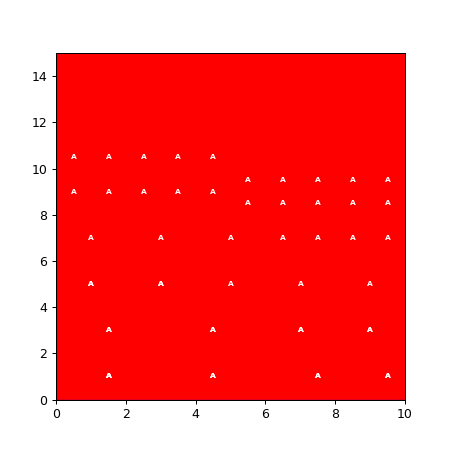

In [24]:
fig, ax = plt.subplots(figsize=(5,5))
ax.set_xlim([0, width])
ax.set_ylim([0, height])

def animate(i):
    x = output[i].x
    y = output[i].y
    w = output[i].width
    h = output[i].height

    r = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='b', facecolor='r', fill=True)

    ax.add_patch(r)
    rx, ry = r.get_xy()
    cx = rx + r.get_width()/2.0
    cy = ry + r.get_height()/2.0
    ax.annotate('A', (cx, cy), color='w', weight='bold', fontsize=6, ha='center', va='center')

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(output), interval=200)

# Test con dataset de prueba

In [25]:
%load_ext memory_profiler

with open('data\\data\\data-changed\\CX\\50.txt') as f:
    line = f.readline().split(' ')
    width = int(line[0])
    
    n = int(f.readline().split(' ')[0])
    
    print(width)
    print(n)
    
    rectangles_list = []
    frequencies_list = []
    output = []
    
    for i in range(n):
        line = f.readline().split('\t')
        rectangles_list.append(Rectangle(int(line[0]), int(line[1])))
        frequencies_list.append(100)
        
        Strip = Rectangle(width, np.inf, 0, 0)
        
    rectangles_list = sorted(rectangles_list, reverse=True)
        
    %time final_height = packing(Strip)

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
400
50
Wall time: 242 ms


<IPython.core.display.Javascript object>


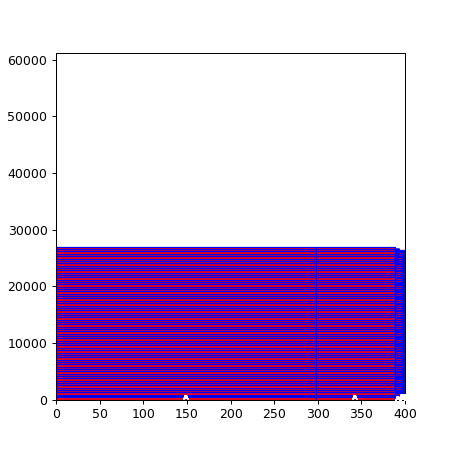

In [14]:
fig, ax = plt.subplots(figsize=(5,5))
ax.set_xlim([0, width])
ax.set_ylim([0, final_height])

def animate(i):
    x = output[i].x
    y = output[i].y
    w = output[i].width
    h = output[i].height

    r = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='b', facecolor='r', fill=True)

    ax.add_patch(r)
    rx, ry = r.get_xy()
    cx = rx + r.get_width()/2.0
    cy = ry + r.get_height()/2.0
#     ax.annotate('A', (cx, cy), color='w', weight='bold', fontsize=6, ha='center', va='center')

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(output), interval=10)

# Ejemplo inventado

In [26]:
%load_ext memory_profiler

width = 50

n = 20

rectangles_list = []
frequencies_list = []
output = []

for i in range(n):
    w = np.random.randint(1,16)
    h = np.random.randint(1,16)
    rectangles_list.append(Rectangle(w, h))
    frequencies_list.append(np.random.randint(100000))

    Strip = Rectangle(width, np.inf, 0, 0)
    
# for r in rectangles_list:
#     print(r)
    
print(frequencies_list)

rectangles_list = sorted(rectangles_list, reverse=True)

%time final_height = packing(Strip)

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
[90429, 46433, 9978, 47598, 76213, 25796, 19106, 50033, 83190, 70251, 71765, 61104, 95526, 11824, 36865, 91057, 66316, 32980, 2452, 49422]
Wall time: 5.59 s


<IPython.core.display.Javascript object>


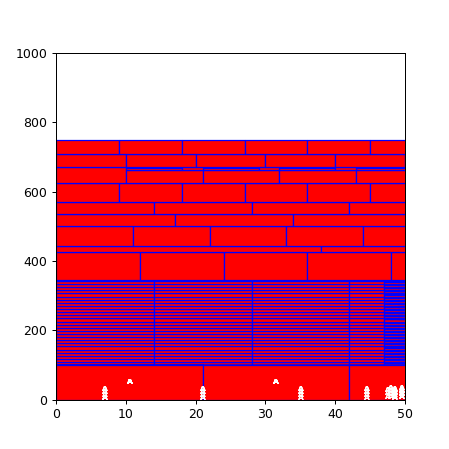

In [27]:
fig, ax = plt.subplots(figsize=(5,5))
ax.set_xlim([0, width])
ax.set_ylim([0, 1000])

def animate(i):
    x = output[i].x
    y = output[i].y
    w = output[i].width
    h = output[i].height

    r = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='b', facecolor='r', fill=True)

    ax.add_patch(r)
    rx, ry = r.get_xy()
    cx = rx + r.get_width()/2.0
    cy = ry + r.get_height()/2.0
#     ax.annotate('A', (cx, cy), color='w', weight='bold', fontsize=6, ha='center', va='center')

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(output), interval=10)

In [18]:
# fig, ax = plt.subplots(figsize=(5,5))
# ax.set_xlim([0, width])
# ax.set_ylim([0, final_height])

# for i, r in enumerate(output):
#     x = output[i].x
#     y = output[i].y
#     w = output[i].width
#     h = output[i].height

#     r = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='b', facecolor='r', fill=True)
#     ax.add_patch(r)
    
# plt.show()

# Otro ejemplo

In [17]:
def total_waste(rectangles_list, total_width, total_height):
    filled_area = 0
    
    for r in rectangles_list:
        filled_area += r.area
        
    return total_width*total_height - filled_area
            

In [28]:
filled_area = 0
final_height = 0
    
with open('data\\data\\data\\2004.Burke.n\\n\\n13.txt') as f:
    line = f.readline().split(' ')
    width = int(line[0])
    
    n = int(f.readline().split(' ')[0])
    
    rectangles_list = []
    frequencies_list = []
    output = []
    
    for i in range(n):
        line = f.readline().split(' ')
        rectangles_list.append(Rectangle(int(line[0]), int(line[1])))
        frequencies_list.append(1)
        
        Strip = Rectangle(width, np.inf, 0, 0)
        
    rectangles_list = sorted(rectangles_list, reverse=True)
        
    %time final_height = packing(Strip)
    
    print("Total area: {}".format(width*final_height))
    print("Total waste: {}".format(total_waste(output, width, final_height)))
    print("Percentage wasted: {}".format(total_waste(output, width, final_height)/(width*final_height)*100))

Wall time: 1.15 s
Total area: 625280
Total waste: 10880
Percentage wasted: 1.7400204708290685


In [20]:
filled_area = 0
final_height = 0
    
with open('data\\data\\data\\2004.Burke.n\\n\\nlist.txt') as f:
    line = f.readline().split(' ')
    width = int(line[0])
    
    n = int(f.readline().split(' ')[0])
    
    rectangles_list = []
    frequencies_list = []
    output = []
    
    for i in range(n):
        line = f.readline().split(' ')
        rectangles_list.append(Rectangle(int(line[0]), int(line[1])))
        frequencies_list.append(1)
        
        Strip = Rectangle(width, np.inf, 0, 0)
        
    rectangles_list = sorted(rectangles_list, reverse=True)
        
    %time final_height = packing(Strip)
    
    print("Total area: {}".format(width*final_height))
    print("Total waste: {}".format(total_waste(output, width, final_height)))
    print("Percentage wasted: {}".format(total_waste(output, width, final_height)/(width*final_height)*100))

ValueError: invalid literal for int() with base 10: 'n1.txt\n'